In [1]:
%run A_FunctionDefinitions.ipynb ; #Contains all definitions 
fdc_info=returnattributeset('fdc_info');  #loads basic info

import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='', api_key='')
#note: You will need to make your own plotly account and fill in your username and api_key

# Creating and Mapping Clusters

In [2]:
#Identify Columns, Create Array

columnX='frac_snow'
columnY='p_seasonality'
columnZ='aridity'

subsetCLIM=returnattributeset('clim')

acceptable=gaugefilter('fdc_info','PctFlow',[98,101]) #if no filter, do list(fdc_info.gauge)

subsetCLIM=subsetCLIM[subsetCLIM.iloc[:,0].isin(acceptable)]; 

x=subsetCLIM[columnX] 
y=subsetCLIM[columnY]
z=subsetCLIM[columnZ]

#create array of above columns
arr=np.zeros((np.size(x),3))
arr[:,0]=x
arr[:,1]=y
arr[:,2]=z

In [7]:
print(__doc__)
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

#Tweak these parameters to get best output
EPS=0.26
MINSAMP=10

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=EPS, min_samples=MINSAMP).fit(arr)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 68


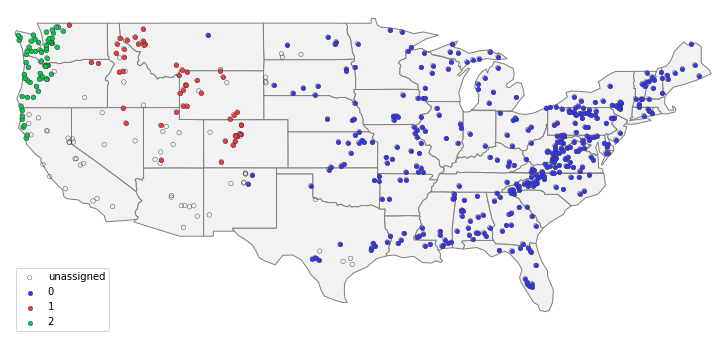

In [8]:
#decide desire colors to rotate through
colorcycling=[ [0.2,0.2,1], [1,0.2,0.2], [0,0.8,0.3], [1,0.5,0], [1,1,0], [0,1,0], [0,1,1], [1,0,1], [0.5,0.25,0], [0,0,0]]

subset=gaugefilter('fdc_info','PctFlow',[98,101])

fig=plt.figure(figsize=(10,8))
CONUSplot()

# Plot background of all gauges
background=fdc_info[fdc_info.gauge.isin(subset)][['gauge','LAT','LONG']]
plt.scatter(background['LONG'],background['LAT'],zorder=3,s=20,facecolors='none',edgecolor=[0.2,0.2,0.2],linewidth=0.4,label='unassigned')

#plot clusters
for num in range(0,max(db.labels_)+1):
    statscluster=set(subsetCLIM[db.labels_==num].gauge_id.values)
    selectedlatlon=fdc_info[fdc_info.gauge.isin(statscluster)][['gauge','LAT','LONG']]
    plt.scatter(selectedlatlon['LONG'],selectedlatlon['LAT'],zorder=3,s=20,facecolor=colorcycling[num],edgecolor=[0.2,0.2,0.2],linewidth=0.4,label=str(num))
plt.legend()
plt.show()

In [9]:
#3D PLOTTING
#Note: Manually edit colorscale as desired, this will not match above colorscale for n_clusters!=3
if n_clusters_==3: #sets 3 colors matching above color cycling. manually adjust for other numbers
    colorscaling=[[0, 'rgb(0.8, 0.8, 0.8)'], #color for unassigned
            [0.33, 'rgb(0.2, 0.2, 0.9)'], 
            [0.67, 'rgb(0.9, 0.2, 0.2)'],
            [1, 'rgb(0, 0.6, 0.3)']]
else: #otherwise cycles through rainbow
    colorscaling=[[0, 'rgb(0.8, 0.8, 0.8)'],
            [0.2, 'rgb(0.1, 0.1, 0.7)'],
            [0.4, 'rgb(0, 0.6, 0.2)'],
            [0.6, 'rgb(0.8,0.8,0)'],
            [0.8, 'rgb(0.8,0,0)'],
            [1, 'rgb(0.8, 0.1, 0.8)']]

col=db.labels_

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=col,                # set color to an array/list of desired values
        colorscale=colorscaling,        
        colorbar=dict(
            title='Category #'
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = Layout(
    scene = dict(    
    xaxis = dict(
        title=columnX),
    yaxis = dict(
        title=columnY),
    zaxis = dict(
        title=columnZ))
)

    
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='CAMELS-clustering')

# Examining Clusters

In [10]:
#WITH ORIGINAL PARAMETERS, EXPLORING CATEGORIES 
East=set(subsetCLIM[db.labels_==0].gauge_id.values)

MtnWest=set(subsetCLIM[db.labels_==1].gauge_id.values)

PNW=set(subsetCLIM[db.labels_==2].gauge_id.values)

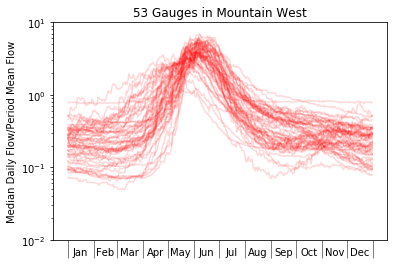

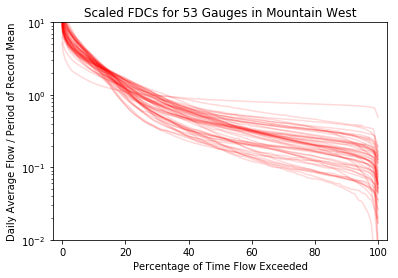

In [11]:
alpha=0.15
acceptable=MtnWest #From above subsets
name='Mountain West' #Desired title
color='r'
fig1=HydrographStack(acceptable,ylims=[0.01,10],subsetname=name,alpha=alpha,color=color)
fig1=FDCstack(acceptable,ylims=[0.01,10],subsetname=name,alpha=alpha,color=color)


In [17]:
#SUMMARIZE ATTRIBUTES
print('MtnWest')
acceptable=MtnWest 
atts=returnattributeset('clim') #or other set of attributes
atts[atts.iloc[:,0].isin(acceptable)].describe() 

MtnWest


,gauge_id,p_mean,pet_mean,p_seasonality,frac_snow,aridity,high_prec_freq,high_prec_dur,low_prec_freq,low_prec_dur
count,5.300000e+01,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1.010066e+07,2.514111,2.876123,-0.382218,0.633946,1.222618,15.770755,1.368599,237.398113,5.298992
std,2.708438e+06,0.618945,0.497791,0.196149,0.095882,0.368948,4.317489,0.102982,22.694300,0.961414
min,6.037500e+06,1.370110,2.165738,-0.773638,0.355358,0.600680,9.700000,1.199005,192.600000,4.098754
25%,7.083000e+06,2.198333,2.489652,-0.517346,0.564570,0.900951,12.750000,1.288462,226.650000,4.730847
50%,1.002300e+07,2.433982,2.735310,-0.382230,0.657119,1.264672,14.600000,1.360000,235.300000,4.918135
75%,1.241450e+07,2.917614,3.275387,-0.249203,0.710600,1.495199,18.500000,1.403409,248.250000,5.649380
max,1.402000e+07,4.042541,4.024814,0.043523,0.777311,1.901755,27.400000,1.645646,288.400000,8.359012


# 3D Plot, Colored by 4th Variable

In [5]:
#this is for a diverging color scale, such as FDC straight line error, color coding should be adjusted if linear

#Variables
columnX='frac_snow'
columnY='p_seasonality'
columnZ='aridity'
columnC='err_1b'; scaletitle='FDC Concavity'

#Categories Variables Come From
dataX='clim'
dataY='clim'
dataZ='clim'
dataC='fdc_info'

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
subsetX=returnattributeset(dataX)
subsetY=returnattributeset(dataY)
subsetZ=returnattributeset(dataZ)
subsetC=returnattributeset(dataC)

subsetX=subsetX[subsetX.iloc[:,0].isin(acceptable)]; 
subsetY=subsetY[subsetY.iloc[:,0].isin(acceptable)]; 
subsetZ=subsetZ[subsetZ.iloc[:,0].isin(acceptable)]; 
subsetC=subsetC[subsetC.iloc[:,0].isin(acceptable)]

x=subsetX[columnX] 
y=subsetY[columnY]
z=subsetZ[columnZ]


col=subsetC[columnC]

colorscaledata=col
cmapmidpoint=1-max(colorscaledata)/(max(colorscaledata)+abs(min(colorscaledata)))


col=subsetC[columnC]

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=col,                # set color to an array/list of desired values
        colorscale=[
            [0, 'rgb(0.7, 0.1, 0.1)'],
            [cmapmidpoint, 'rgb(0.9, 0.9, 0.7)'],
            [1, 'rgb(0.1, 0.1, 0.7)']
        ],        
        colorbar=dict(
            title=scaletitle
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = Layout(
    scene = dict(    
    xaxis = dict(
        title=columnX),
    yaxis = dict(
        title=columnY),
    zaxis = dict(
        title=columnZ))
)

    
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='CAMELS-colorscaled')